# Early stopping
---------------------------

This example shows how to use early stopping to reduce the time it takes to run a pipeline. This option is only available for models that allow in-training evaluation (XGBoost, LightGBM and CatBoost).

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Initialize atom
atom = ATOMClassifier(X, y, n_jobs=2, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 2 cores.

Dataset stats ====================== >>
Shape: (569, 31)
Scaled: False
Outlier values: 174 (1.2%)
---------------------------------------
Train set size: 456
Test set size: 113
---------------------------------------
|    | dataset   | train     | test     |
|---:|:----------|:----------|:---------|
|  0 | 212 (1.0) | 167 (1.0) | 45 (1.0) |
|  1 | 357 (1.7) | 289 (1.7) | 68 (1.5) |



In [4]:
# Train the models using early stopping. An early stopping value of 0.1 means
# that the model will stop if it didn't improve in the last 10% of it's iterations
atom.run(
    models="LGB",
    metric="ap",
    n_calls=7,
    n_initial_points=3,
    bo_params={"early_stopping": 0.1, "cv": 1},
)


Training ===================================== >>
Models: LGB
Metric: average_precision


Running BO for LightGBM...
Initial point 1 ---------------------------------
Parameters --> {'n_estimators': 499, 'learning_rate': 0.73, 'max_depth': 1, 'num_leaves': 40, 'min_child_weight': 5, 'min_child_samples': 18, 'subsample': 0.7, 'colsample_bytree': 0.8, 'reg_alpha': 100.0, 'reg_lambda': 10.0}
Early stop at iteration 50 of 499.
Evaluation --> average_precision: 0.6304  Best average_precision: 0.6304
Time iteration: 0.061s   Total time: 0.092s
Initial point 2 ---------------------------------
Parameters --> {'n_estimators': 170, 'learning_rate': 0.11, 'max_depth': 4, 'num_leaves': 25, 'min_child_weight': 11, 'min_child_samples': 28, 'subsample': 0.7, 'colsample_bytree': 0.6, 'reg_alpha': 100.0, 'reg_lambda': 10.0}
Early stop at iteration 18 of 170.
Evaluation --> average_precision: 0.6304  Best average_precision: 0.6304
Time iteration: 0.047s   Total time: 0.434s
Initial point 3 -----------

## Analyze the results

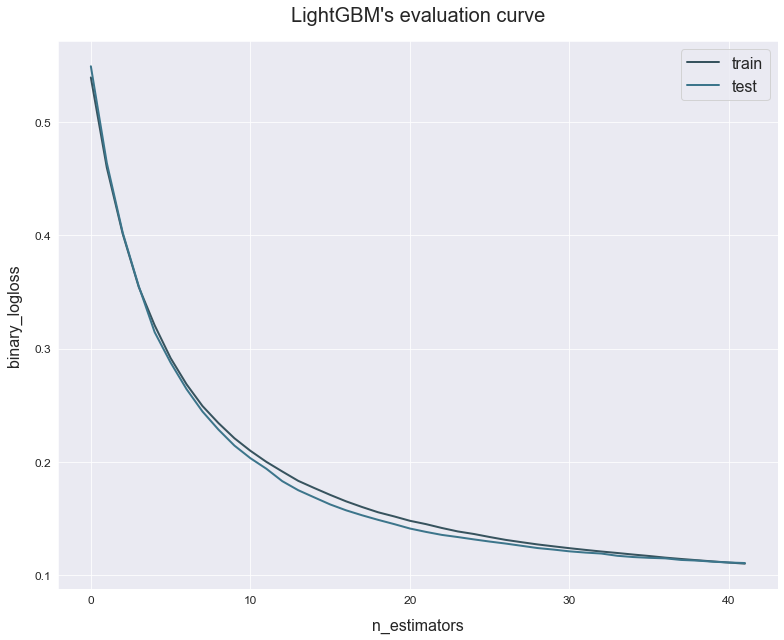

In [5]:
# Plot the evaluation on the train and test set during training
# Note that the metric is provided by the estimator's package, not ATOM!
atom.lgb.plot_evals(title="LightGBM's evaluation curve", figsize=(11, 9))